### Which month was the best for sales and how much was sold?

### Import necessary packages!

In [1]:
import pandas as pd
import os

### Merge all 12 files into 1

In [2]:


files = [file for file in os.listdir('./SalesAnalysis/Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('./SalesAnalysis/Sales_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('all_data.csv', index = False)

### Clean up the data

In [3]:
all_data = pd.read_csv('./all_data.csv')

all_data['Month'] = all_data['Order Date'].str[0:2]

all_data = all_data.drop(1, axis = 0)

all_data = all_data.reset_index()

all_data.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
2,3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
3,4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [49]:
#pd.set_option('display.max_rows', 500)
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].apply(pd.to_numeric, errors='coerce')
all_data['Price Each'] = all_data['Price Each'].apply(pd.to_numeric, errors='coerce')

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
355,356,NaN,NaN,NaN,NaN,NaN,NaN,NaN
734,735,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1432,1433,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1552,1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1570,1571,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
all_data['Price Each'].to_csv('PriceEachCheck.csv')

/Users/nenadsavic/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [14]:
all_data = all_data.dropna()
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [10]:
all_data['Month'] = all_data['Month'].astype('int32')

In [47]:
all_data.head()

,level_0,index,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,0,0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,1,2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,2,3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,3,4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,4,5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add a sales column

In [20]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [21]:
all_data.insert(6, 'Sales', all_data['Quantity Ordered'] * all_data['Price Each'])
all_data.head()

,level_0,index,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,0,0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
1,1,2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
2,2,3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
3,3,4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,4,5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [44]:
all_data['Sales'].sum()

34492035.97

In [63]:
list_of_sales_by_month = []
for i in range(1,13):
    suma = all_data['Sales'].where(all_data['Month'] == i).sum()
    list_of_sales_by_month.append(suma)
maximum = max(list_of_sales_by_month)
print(list_of_sales_by_month)
print('Month: ', list_of_sales_by_month.index(maximum) +1, '\t', 'Amount: ', maximum)

[1822256.7299999997, 2202022.42, 2807100.38, 3390670.2399999993, 3152606.7499999995, 2577802.2600000002, 2647775.7599999993, 2244467.88, 2097560.13, 3736726.88, 3199603.1999999997, 4613443.340000001]
Month:  12 	 Amount:  4613443.340000001


In [36]:
all_data['Sales'].where(all_data['Month'] == 1).sum()
all_data['Sales'].where(all_data['Month'] == 2).sum()

1822256.7299999997

In [40]:
for i in range(1,3):
    suma = 0
    suma += all_data['Sales'].where(all_data['Month'] == i).sum()
    print(suma)

1822256.7299999997
2202022.42


In [74]:
all_data.groupby('Month').sum()['Sales'].sort_values()

Month
1     1.822257e+06
9     2.097560e+06
2     2.202022e+06
8     2.244468e+06
6     2.577802e+06
7     2.647776e+06
3     2.807100e+06
5     3.152607e+06
11    3.199603e+06
4     3.390670e+06
10    3.736727e+06
12    4.613443e+06
Name: Sales, dtype: float64

In [75]:
import matplotlib.pyplot as plt

<BarContainer object of 12 artists>

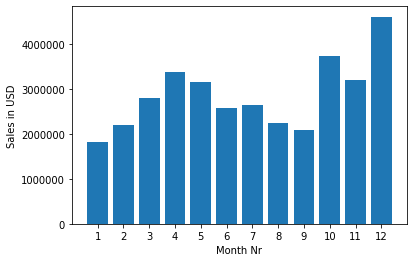

In [79]:
months = range(1,13)
results = all_data.groupby('Month').sum()
plt.xticks(months)
plt.xlabel('Month Nr')
plt.ylabel('Sales in USD')
plt.bar(months, results['Sales'])

### What city had a highest number of sales?